In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2013/fer2013.csv
/kaggle/input/ferplus-csv/ferplus_data.csv
/kaggle/input/training/best_model_ferplus_Adam_Flatten.keras
/kaggle/input/emodata-v2/emodata_v2.csv


In [3]:
import shutil

# Sao chép file từ thư mục nguồn (input) đến thư mục đích (working)
shutil.copy('/kaggle/input/training/best_model_ferplus_Adam_Flatten.keras', '/kaggle/working/')


'/kaggle/working/best_model_ferplus_Adam_Flatten.keras'

# 1. **Chuẩn bị**

# 1. 1. Cài đặt các thư viện cần thiết

In [1]:
!pip install --upgrade pip
!pip install numpy==1.26.4 tensorflow==2.17.0  keras==3.2.0  seaborn==0.11.2 scikit-learn==1.2.2 matplotlib==3.7.1 plotly==5.10.0 pandas==2.1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.2 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 63.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


# 1. 2. Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import keras
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential, Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

# Turn off warnings
warnings.simplefilter("ignore")


# 1. 3. Loading the data

In [3]:
data = pd.read_csv("/kaggle/input/ferplus-csv/ferplus_data.csv")
print ("Shape of data = ", data.shape)

Shape of data =  (78293, 3)


# 1. 4. Tổng dữ liệu trống 

In [4]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

# 1. 5. Dữ liệu

In [5]:
data.head()

,emotion,pixels,Usage
0,0,0 0 0 19 32 29 40 51 54 53 50 41 34 40 39 33 3...,train
1,0,32 49 40 49 44 26 23 19 19 32 54 78 97 116 137...,train
2,0,13 29 34 39 42 49 52 48 49 64 65 54 46 47 47 4...,train
3,0,0 160 239 233 234 235 235 236 235 246 165 79 5...,train
4,0,1 2 2 4 4 4 4 4 4 4 11 13 14 14 20 24 15 21 30...,train


# **2. Data pre-processing**

# 2. 1. Bảng phân phối dữ liệu (Training)

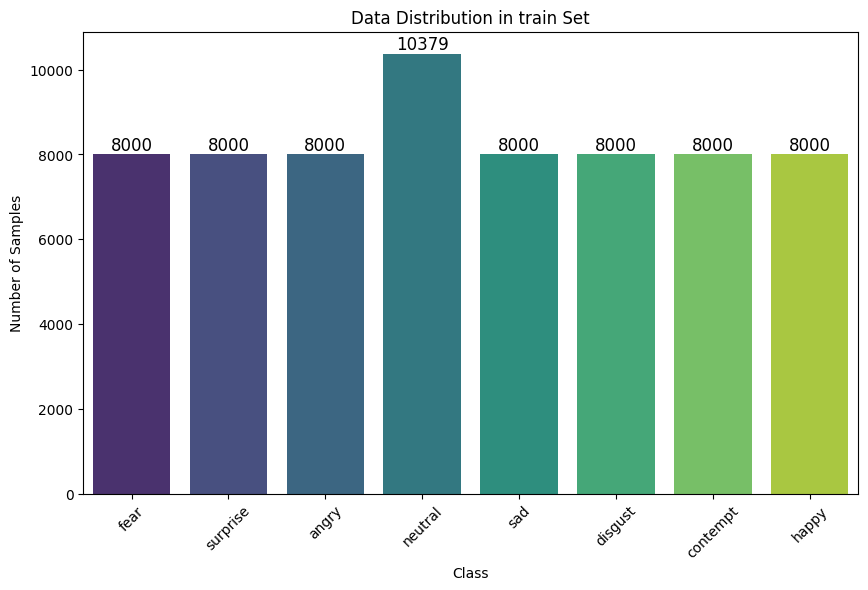

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
CLASS_LABELS = ['fear', 'surprise', 'angry', 'neutral', 'sad', 'disgust', 'contempt', 'happy']
# Function to plot data distribution from ferplus.csv
def plot_data_distribution_from_csv(data, usage='train'):
 

    # Lọc dữ liệu theo Usage
    filtered_data = data[data['Usage'] == usage]

    # Đếm số lượng mẫu cho từng nhãn cảm xúc
    emotion_counts = filtered_data['emotion'].value_counts().sort_index()

    # Gán nhãn cảm xúc
   

    # Tạo biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=CLASS_LABELS, y=emotion_counts, palette="viridis")

    # Hiển thị số lượng trên các cột
    for i, count in enumerate(emotion_counts):
        plt.text(
            i,
            count + 0.5,
            str(count),
            ha="center",
            va="bottom",
            fontsize=12,
            color="black",
        )

    # Cập nhật tiêu đề và nhãn
    plt.title(f"Data Distribution in {usage} Set")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.show()

# Gọi hàm với đường dẫn tới ferplus.csv
plot_data_distribution_from_csv(data, usage='train')


# 3. 2. Shuffling the data

In [7]:
# Shuffle và reset index
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# 3. 3. One Hot Encoding

In [8]:
# Chuẩn bị nhãn
labels = to_categorical(data['emotion'], num_classes=8)  # Chuyển đổi nhãn cảm xúc thành one-hot encoding


# 3. 4. Chuyển đổi pixel từ chuỗi sang mảng 48x48 và thay đổi kiểu dữ liệu thành float32

In [9]:
pixels = np.array([np.fromstring(p, sep=' ') for p in data['pixels']], dtype='float32')
pixels = pixels.reshape((data.shape[0], 48, 48, 1))  # Đảm bảo dữ liệu có hình dạng (n, 48, 48, 1)


# **4. Train test validation split**

# 4. 1. Chuẩn hóa dữ liệu pixel

In [10]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels.reshape((data.shape[0], -1))).reshape((data.shape[0], 48, 48, 1))

# 4. 2. Chia dữ liệu (Train - 80% - Test - 10% - Val - 20%) 

In [11]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra (90% - 10%)
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)

# Chia tập huấn luyện thành tập huấn luyện và tập validation (90% huấn luyện, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [12]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Validation shape:", X_val.shape)

Train shape: (56370, 48, 48, 1)
Test shape: (7830, 48, 48, 1)
Validation shape: (14093, 48, 48, 1)


# **5. Data augmentation using ImageDataGenerator**

In [ ]:
# datagen = ImageDataGenerator(  width_shift_range = 0.1,
#                                height_shift_range = 0.1,
#                                horizontal_flip = True,
#                                zoom_range = 0.2)
# valgen = ImageDataGenerator(   width_shift_range = 0.1,
#                                height_shift_range = 0.1,
#                                horizontal_flip = True,
#                                zoom_range = 0.2)

# 5. 1. Tăng cường dữ liệu

In [13]:
datagen = ImageDataGenerator(
    # Các tham số chuẩn hóa và bình thường hóa dữ liệu
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    
    # Các phép biến đổi hình ảnh
    rotation_range=20,  # Xoay hình ảnh trong phạm vi từ 0 đến 20 độ
    zoom_range=0.2,  # Tăng giảm kích thước ảnh (zoom in/out)
    width_shift_range=0.1,  # Dịch chuyển hình ảnh theo chiều ngang (10% ảnh)
    height_shift_range=0.1,  # Dịch chuyển hình ảnh theo chiều dọc (10% ảnh)
    
    # Lật hình ảnh ngang hoặc dọc
    horizontal_flip=True,  # Lật ảnh theo chiều ngang (phù hợp với nhiều dữ liệu)
    vertical_flip=False,  # Tắt lật ảnh theo chiều dọc (thường không cần với bộ dữ liệu cảm xúc)
    
    # Các phương pháp khác để cải thiện mô hình
    shear_range=0.2,  # Xoay nghiêng ảnh theo một góc nhất định
    fill_mode='nearest',  # Cách điền các pixel bị thiếu sau khi thực hiện các phép biến đổi (nearest là phương pháp tốt nhất cho ảnh)
)

valgen = ImageDataGenerator()

In [14]:
datagen.fit(X_train)
# valgen.fit(X_val)

In [15]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

# 5. 2. Hiển thị mỗi một ảnh ngẫu nhiên tương ứng với 7 class

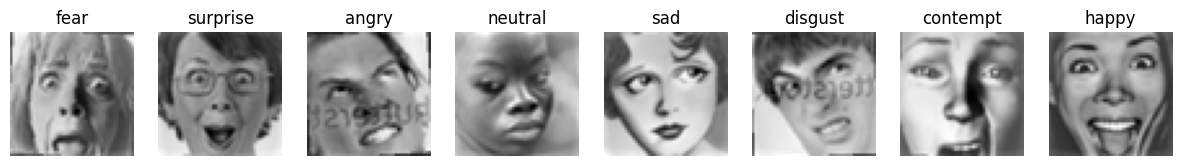

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 
plt.figure(figsize=(15, 23))

label_dict = {0: "fear", 1: "surprise", 2: "angry", 3: "neutral", 4: "sad", 5: "disgust", 6: "contempt", 7: "happy"}

# Lặp qua từng class
for i in range(8):
    # Lọc các chỉ số của ảnh thuộc class hiện tại
    class_indices = np.where(np.argmax(y_train, axis=1) == i)[0]
    # Chọn ngẫu nhiên một chỉ số từ class hiện tại
    random_index = np.random.choice(class_indices)
    # Lấy ảnh ngẫu nhiên từ class hiện tại
    img = np.squeeze(X_train[random_index])
    
    # Hiển thị ảnh
    plt.subplot(1, 8, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(CLASS_LABELS[i])
    plt.axis('off')

plt.show()


# **6. Design a model**

# 6. 1. CNN model with Adam - Flatten

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def cnn_model_Flatten():
    model = tf.keras.models.Sequential()
    
    # Layer 1
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    
    # Layer 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))  # Dropout thấp để giữ thông tin
    
    # Layer 3
    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Dropout trung bình để tránh overfitting
    
    # Layer 4
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Tăng nhẹ Dropout ở layer sâu hơn
    
    # Layer 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))  # Tăng Dropout để giảm overfitting ở layer phức tạp
    
    # Layer 6
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))  # Dropout cao nhất ở layer sâu nhất
    
    # Flatten và Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))  # Fully Connected cần Dropout cao
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))  # Fully Connected cần Dropout cao
    
    # Output Layer
    model.add(Dense(8, activation='softmax'))
    
    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [22]:
model = cnn_model_Flatten()

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,810,696 (22.17 MB)

 Trainable params: 5,805,704 (22.15 MB)

 Non-trainable params: 4,992 (19.50 KB)

# 6. 2. Early stopping

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# Các callback
checkpointer = [
    EarlyStopping(
        monitor='val_loss',  # Theo dõi loss của tập validation
        verbose=1,
        restore_best_weights=True,
        mode="min",  # Theo dõi loss thấp nhất
        patience=20  # Tăng patience để mô hình có thêm thời gian học
    ),
    ModelCheckpoint(
        'best_model_ferplus_Adam_Flatten.keras',
        monitor="val_loss",  # Lưu mô hình tốt nhất dựa trên loss của tập validation
        verbose=1,
        save_best_only=True,
        mode="min"  # Dựa vào loss thấp nhất
    ),
    ReduceLROnPlateau(
        monitor='val_loss',  # Giảm learning rate nếu loss trên tập validation không cải thiện
        factor=0.5,  # Giảm learning rate chậm hơn
        patience=5,  # Giảm learning rate sau 5 epochs nếu không cải thiện
        min_lr=0.000001,
        verbose=1
    )
]

In [1]:
from tensorflow.keras.models import load_model

# Tải lại mô hình đã lưu
model = load_model('/kaggle/input/trainned/best_model_ferplus_Adam_Flatten.keras')


In [28]:
history = model.fit(train_generator,
                    epochs=500,
                    batch_size=32,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/500
1760/1762 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8769 - loss: 0.5141
Epoch 1: val_loss improved from 7.24442 to 0.45592, saving model to best_model_ferplus_Adam_Flatten.keras
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.8769 - loss: 0.5141 - val_accuracy: 0.8952 - val_loss: 0.4559 - learning_rate: 6.2500e-06
Epoch 2/500
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8748 - loss: 0.5126
Epoch 2: val_loss improved from 0.45592 to 0.45516, saving model to best_model_ferplus_Adam_Flatten.keras
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8748 - loss: 0.5126 - val_accuracy: 0.8940 - val_loss: 0.4552 - learning_rate: 6.2500e-06
Epoch 3/500
1761/1762 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8765 - loss: 0.5117
Epoch 3: val_loss did not improve from 0.45516
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8765 - loss: 0.5117 - val_accuracy: 0.8932 - val_loss: 0.4583 - learning_rate: 6.2500e-06
Epoch 4/500
1762/1762 ━━

# 6. 3. Lưu lại model với json và h5

In [2]:
# Lưu cấu trúc mô hình vào file JSON
fer_json = model.to_json()
with open("ferplus_Adam_Flatten.json", "w") as json_file:
    json_file.write(fer_json)

# Lưu trọng số của mô hình vào file H5
model.save_weights("ferplus_Adam_Flatten.weights.h5")

print("Model structure saved as ferplus_Adam_Flatten.json")
print("Model weights saved as ferplus_Adam_Flatten.weights.h5")


Model structure saved as ferplus_Adam_Flatten.json
Model weights saved as ferplus_Adam_Flatten.weights.h5


# **7. Visualizing results**

# 7. 1. So sánh loss giữa Traning với Validation 

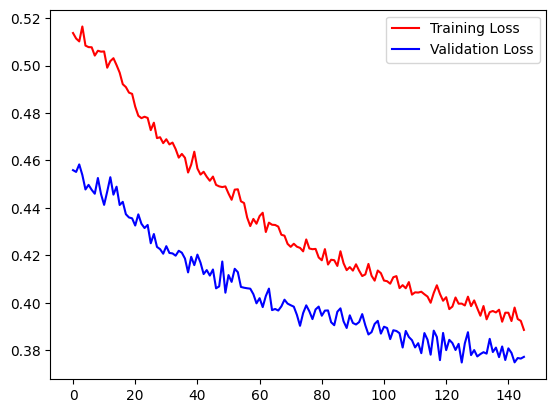

In [30]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

# 7. 2. So sánh accurancy giữa Traning với Validation 

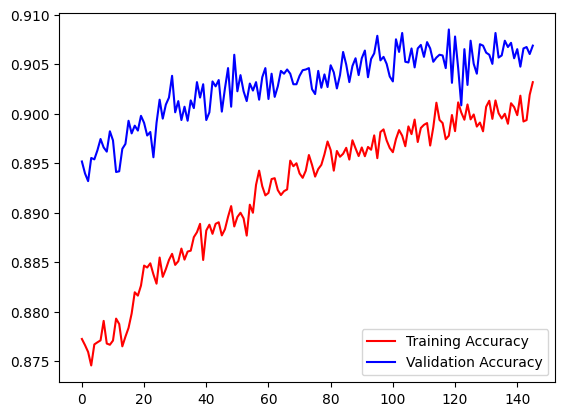

In [32]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

# 7. 3. Kiểm tra model với tập Test

In [33]:
loss = model.evaluate(X_test,y_test)
print("Test Accurancy: " + str(loss[1]))

245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9210 - loss: 0.3630
Test Accurancy: 0.9197956323623657


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


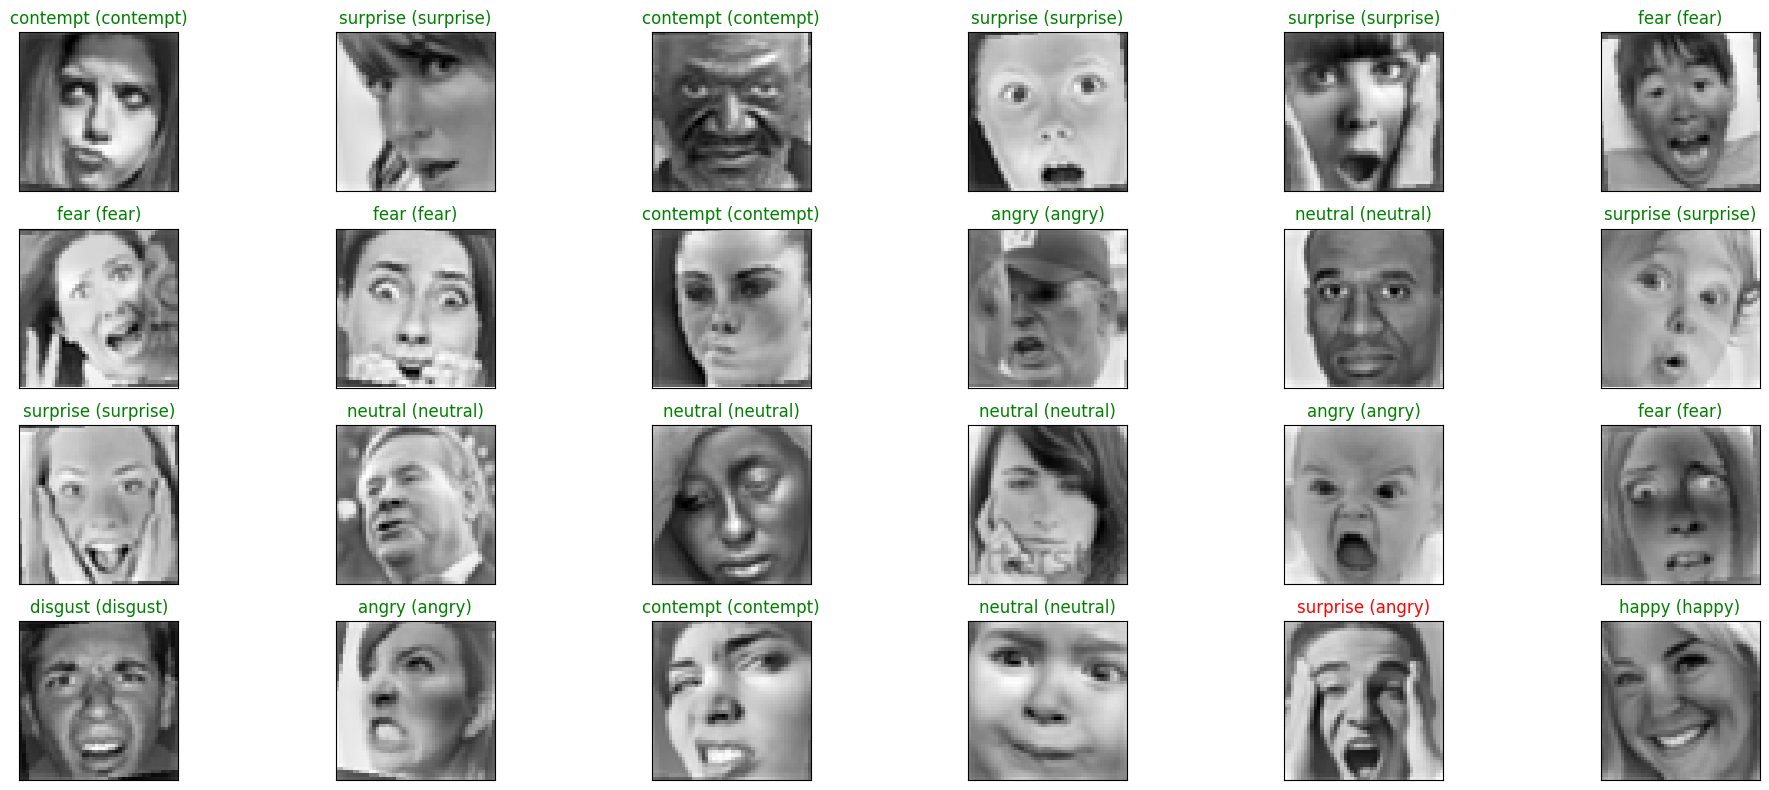

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dự đoán
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)  # Lấy nhãn dự đoán (0-7)
y_true = np.argmax(y_test, axis=1)  # Lấy nhãn thực tế từ one-hot encoding

# Từ điển nhãn
label_dict = {0: "fear", 1: "surprise", 2: "angry", 3: "neutral", 4: "sad", 5: "disgust", 6: "contempt", 7: "happy"}

# Vẽ 24 hình ảnh ngẫu nhiên
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]), cmap='gray')  # Hiển thị ảnh (grayscale)
    
    # Lấy chỉ số và nhãn
    predict_label = label_dict[y_pred[index]]
    true_label = label_dict[y_true[index]]

    # Đặt tiêu đề với màu sắc phù hợp
    color = "green" if y_pred[index] == y_true[index] else "red"
    ax.set_title(f"{predict_label} ({true_label})", color=color)

plt.tight_layout()
plt.show()

# 7. 4. Confusion Matrix

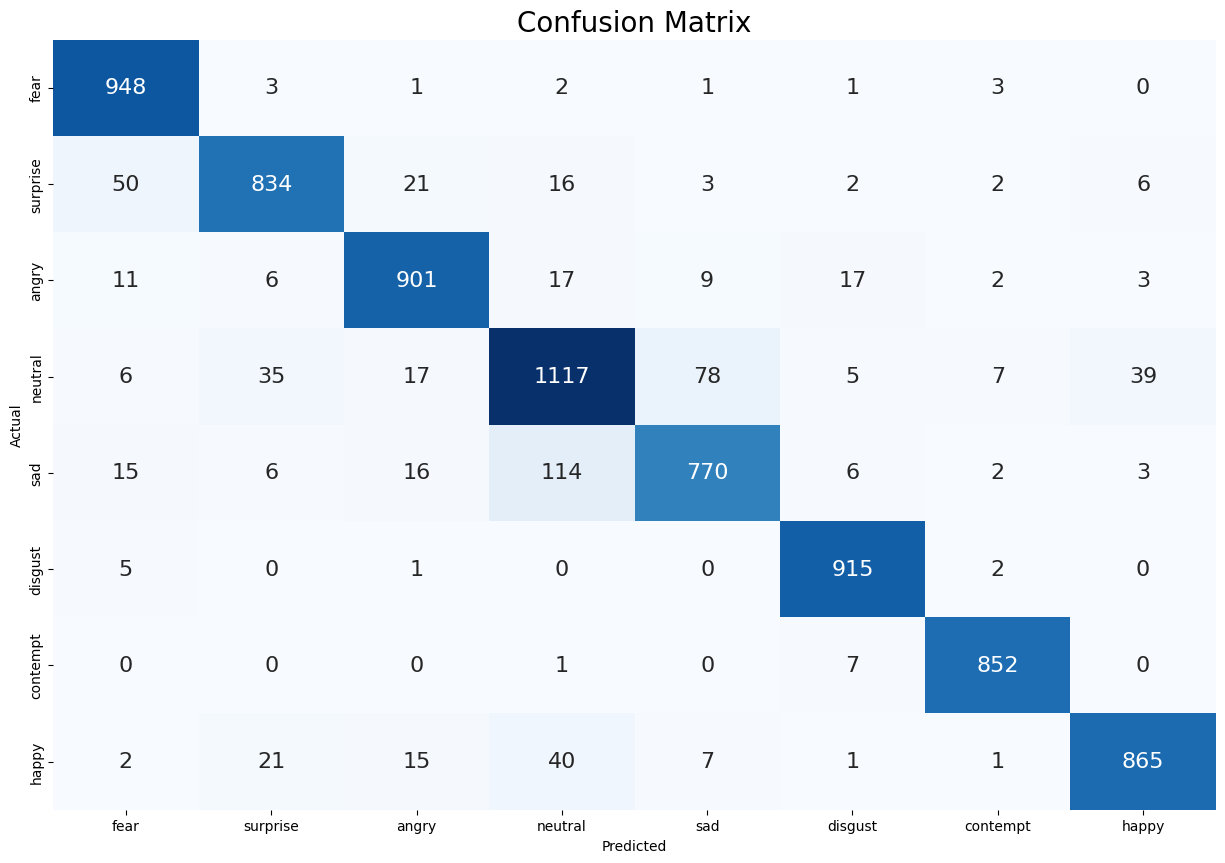

In [35]:
cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

# 7. 5. Classification report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.903     0.985     0.942       959
           1      0.916     0.877     0.896       934
           2      0.929     0.912     0.921       966
           3      0.840     0.847     0.843      1304
           4      0.878     0.805     0.840       932
           5      0.954     0.991     0.972       923
           6      0.972     0.993     0.982       860
           7      0.923     0.905     0.914       952

    accuracy                          0.911      7830
   macro avg      0.914     0.914     0.914      7830
weighted avg      0.910     0.911     0.910      7830



# **8. Fine tuning**

# Changing optimizer - Nadam

In [ ]:
model = cnn_model_Flatten()

In [ ]:
from tensorflow.keras.optimizers import Nadam
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpointer = [
    EarlyStopping(
        monitor='val_loss',  # Sử dụng accuracy để theo dõi
        verbose=1,
        restore_best_weights=True,
        mode="min",
        patience=20  # Tăng patience để cho mô hình thêm thời gian học
    ),
    ModelCheckpoint(
        'best_model_ferplus_Nadam_Flatten.keras',
        monitor="val_loss",  # Sử dụng accuracy để theo dõi
        verbose=1,
        save_best_only=True,
        mode="min"
    ),
    ReduceLROnPlateau(
        monitor='val_loss',  # Sử dụng loss để giảm learning rate
        factor=0.5,
        patience=5,
        min_lr=0.000001,
        verbose=1
    )
]

In [ ]:
history = model.fit(train_generator,
                    epochs=500,
                    batch_size=32,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

In [ ]:
# Lưu cấu trúc mô hình vào file JSON
fer_json = model.to_json()
with open("ferplus_Nadam_Flatten.json", "w") as json_file:
    json_file.write(fer_json)

# Lưu trọng số của mô hình vào file H5
model.save_weights("ferplus_Nadam_Flatten.weights.h5")

print("Model structure saved as ferplus_Nadam_Flatten.json")
print("Model weights saved as ferplus_Nadam_Flatten.weights.h5")


In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dự đoán
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)  # Lấy nhãn dự đoán (0-6)
y_true = np.argmax(y_test, axis=1)  # Lấy nhãn thực tế từ one-hot encoding

# Từ điển nhãn
label_dict = {0: "fear", 1: "surprise", 2: "angry", 3: "neutral", 4: "sad", 5: "disgust", 6: "contempt", 7: "happy"}
# Vẽ 24 hình ảnh ngẫu nhiên
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]), cmap='gray')  # Hiển thị ảnh (grayscale)
    
    # Lấy chỉ số và nhãn
    predict_label = label_dict[y_pred[index]]
    true_label = label_dict[y_true[index]]

    # Đặt tiêu đề với màu sắc phù hợp
    color = "green" if y_pred[index] == y_true[index] else "red"
    ax.set_title(f"{predict_label} ({true_label})", color=color)

plt.tight_layout()
plt.show()

# **9. Sử dụng Global Average Pooling thay vì Flatten**

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def cnn_model_GAP():
    model = tf.keras.models.Sequential()

    # Layer 1
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    
    # Layer 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Layer 3
    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Layer 4
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Layer 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    # Layer 6
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Global Average Pooling
    model.add(GlobalAveragePooling2D())

    # Fully Connected Layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(8, activation='softmax'))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [18]:
model = cnn_model_GAP()

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,807,624 (22.15 MB)

 Trainable params: 5,804,168 (22.14 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# Các callback
checkpointer = [
    EarlyStopping(
        monitor='val_loss',  # Theo dõi loss của tập validation
        verbose=1,
        restore_best_weights=True,
        mode="min",  # Theo dõi loss thấp nhất
        patience=20  # Tăng patience để mô hình có thêm thời gian học
    ),
    ModelCheckpoint(
        'best_model_ferplus_Adam_GAP.keras',
        monitor="val_loss",  # Lưu mô hình tốt nhất dựa trên loss của tập validation
        verbose=1,
        save_best_only=True,
        mode="min"  # Dựa vào loss thấp nhất
    ),
    ReduceLROnPlateau(
        monitor='val_loss',  # Giảm learning rate nếu loss trên tập validation không cải thiện
        factor=0.5,  # Giảm learning rate chậm hơn
        patience=5,  # Giảm learning rate sau 5 epochs nếu không cải thiện
        min_lr=0.000001,
        verbose=1
    )
]

In [ ]:
history = model.fit(train_generator,
                    epochs=500,
                    batch_size=32,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/500
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1432 - loss: 13.3984
Epoch 1: val_loss improved from inf to 7.99616, saving model to best_model_ferplus_Adam_GAP.keras
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 57s 25ms/step - accuracy: 0.1432 - loss: 13.3973 - val_accuracy: 0.1403 - val_loss: 7.9962 - learning_rate: 1.0000e-04
Epoch 2/500
1761/1762 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1787 - loss: 6.4715
Epoch 2: val_loss improved from 7.99616 to 3.55174, saving model to best_model_ferplus_Adam_GAP.keras
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.1787 - loss: 6.4702 - val_accuracy: 0.2560 - val_loss: 3.5517 - learning_rate: 1.0000e-04
Epoch 3/500
1761/1762 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2316 - loss: 3.2264
Epoch 3: val_loss improved from 3.55174 to 2.47221, saving model to best_model_ferplus_Adam_GAP.keras
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.2316 - loss: 3.2261 - val_accuracy: 0.3483 - val_loss: 2.4722 - learn

In [ ]:
# Lưu cấu trúc mô hình vào file JSON
fer_json = model.to_json()
with open("ferplus_Adam_GAP.json", "w") as json_file:
    json_file.write(fer_json)

# Lưu trọng số của mô hình vào file H5
model.save_weights("ferplus_Adam_GAP.weights.h5")

print("Model structure saved as ferplus_Adam_GAP.json")
print("Model weights saved as ferplus_Adam_GAP.weights.h5")


In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Accurancy: " + str(loss[1]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dự đoán
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)  # Lấy nhãn dự đoán (0-6)
y_true = np.argmax(y_test, axis=1)  # Lấy nhãn thực tế từ one-hot encoding

# Từ điển nhãn
label_dict = {0: "fear", 1: "surprise", 2: "angry", 3: "neutral", 4: "sad", 5: "disgust", 6: "contempt", 7: "happy"}

# Vẽ 24 hình ảnh ngẫu nhiên
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]), cmap='gray')  # Hiển thị ảnh (grayscale)
    
    # Lấy chỉ số và nhãn
    predict_label = label_dict[y_pred[index]]
    true_label = label_dict[y_true[index]]

    # Đặt tiêu đề với màu sắc phù hợp
    color = "green" if y_pred[index] == y_true[index] else "red"
    ax.set_title(f"{predict_label} ({true_label})", color=color)

plt.tight_layout()
plt.show()

In [ ]:
cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

# **10. Fine Tuning**

# Change optimizer -  Nadam

In [ ]:
model = cnn_model_GAP()

In [ ]:
from tensorflow.keras.optimizers import Nadam
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpointer = [
    EarlyStopping(
        monitor='val_loss',  # Sử dụng accuracy để theo dõi
        verbose=1,
        restore_best_weights=True,
        mode="min",
        patience=20  # Tăng patience để cho mô hình thêm thời gian học
    ),
    ModelCheckpoint(
        'best_model_ferplus_Nadam_GAP.keras',
        monitor="val_loss",  # Sử dụng accuracy để theo dõi
        verbose=1,
        save_best_only=True,
        mode="min"
    ),
    ReduceLROnPlateau(
        monitor='val_loss',  # Sử dụng loss để giảm learning rate
        factor=0.5,
        patience=5,
        min_lr=0.000001,
        verbose=1
    )
]

In [ ]:
history = model.fit(train_generator,
                    epochs=500,
                    batch_size=32,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

In [ ]:
# Lưu cấu trúc mô hình vào file JSON
fer_json = model.to_json()
with open("ferplus_Nadam_GAP.json", "w") as json_file:
    json_file.write(fer_json)

# Lưu trọng số của mô hình vào file H5
model.save_weights("ferplus_Nadam_GAP.weights.h5")
print("Model structure saved as ferplus_Nadam_GAP.json")
print("Model weights saved as ferplus_Nadam_GAP.weights.h5")

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))


In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()


In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Tạo dự đoán
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)  # Lấy nhãn dự đoán (0-6)
y_true = np.argmax(y_test, axis=1)  # Lấy nhãn thực tế từ one-hot encoding

# Từ điển nhãn
label_dict = {0: "fear", 1: "surprise", 2: "angry", 3: "neutral", 4: "sad", 5: "disgust", 6: "contempt", 7: "happy"}

# Vẽ 24 hình ảnh ngẫu nhiên
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]), cmap='gray')  # Hiển thị ảnh (grayscale)
    
    # Lấy chỉ số và nhãn
    predict_label = label_dict[y_pred[index]]
    true_label = label_dict[y_true[index]]

    # Đặt tiêu đề với màu sắc phù hợp
    color = "green" if y_pred[index] == y_true[index] else "red"
    ax.set_title(f"{predict_label} ({true_label})", color=color)

plt.tight_layout()
plt.show()